In [2]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt

## 4-b)

[[ 44.38632327  33.36743274]]
converge!
473
[ 43.07188418  32.71217798]


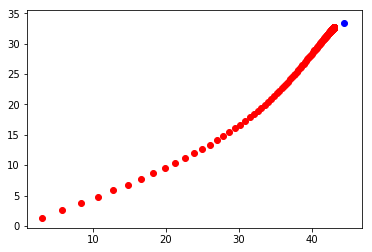

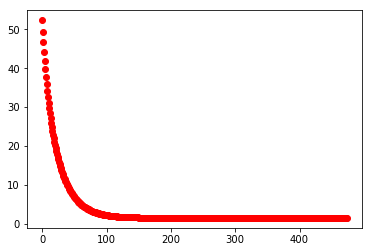

In [48]:
########################################################################
#########  Data Generating Functions ###################################
########################################################################
def generate_sensors(k = 7, d = 2):
	"""
	Generate sensor locations. 
	Input:
	k: The number of sensors.
	d: The spatial dimension.
	Output:
	sensor_loc: k * d numpy array.
	"""
	sensor_loc = 100*np.random.randn(k,d)
	return sensor_loc

def generate_data(sensor_loc, k = 7, d = 2, 
				 n = 1, original_dist = True):
	"""
	Generate the locations of n points.  

	Input:
	sensor_loc: k * d numpy array. Location of sensor. 
	k: The number of sensors.
	d: The spatial dimension.
	n: The number of points.
	original_dist: Whether the data are generated from the original 
	distribution. 

	Output:
	obj_loc: n * d numpy array. The location of the n objects. 
	distance: n * k numpy array. The distance between object and 
	the k sensors. 
	"""
	assert k, d == sensor_loc.shape

	obj_loc = 100*np.random.randn(n, d)
	if not original_dist:
	   obj_loc += 300
	   
	distance = scipy.spatial.distance.cdist(obj_loc, 
										   sensor_loc, 
										   metric='euclidean')
	distance += np.random.randn(n, k)  
	return obj_loc, distance
##################################################################
# Starter code for Part (b)
##################################################################
np.random.seed(0)
sensor_loc = generate_sensors()
obj_loc, distance = generate_data(sensor_loc)
single_distance = distance[0]
print(obj_loc)
obj_loc_new = [0, 0]
obj_loc_old = [0, 0]
error = []
step_size = 0.01
d_loss = [0,0]
# gradient is d_loss
for cnt in range(1000):
    for i in range(7):
        d_loss += - 2*(np.linalg.norm(sensor_loc[i,:] - obj_loc_old) - distance[0,i])*(sensor_loc[i,:] - obj_loc_old)/np.linalg.norm(sensor_loc[i,:] - obj_loc_old)
    obj_loc_new = obj_loc_old - step_size*d_loss
    error.append(np.linalg.norm(obj_loc_new-obj_loc))
    obj_loc_old = obj_loc_new
    if np.linalg.norm(d_loss) < 0.000001:
        print('converge!')
        print(cnt)
        print(obj_loc_new)
        break
    d_loss = [0, 0]
    plt.scatter(obj_loc_new[0],obj_loc_new[1],c = 'red')
plt.scatter(obj_loc[0,0],obj_loc[0,1],c = 'blue')
plt.show()
plt.scatter(range(np.size(error)),error,c = 'red')

plt.show()

when initial point is [0,0] , choose step size 0.01, takes 473 steps to converge
whnen it's [100,0], choose step size 0.01, takes 466 steps to converge

## 4-c)

In [119]:
##################################################################
# Starter code for Part (c)
##################################################################
def generate_data_given_location(sensor_loc, obj_loc, k = 7, d = 2):
	"""
	Generate the distance measurements given location of a single object and sensor. 

	Input:
	obj_loc: 1 * d numpy array. Location of object
	sensor_loc: k * d numpy array. Location of sensor. 
	k: The number of sensors.
	d: The spatial dimension. 

	Output: 
	distance: 1 * k numpy array. The distance between object and 
	the k sensors. 
	"""
	assert k, d == sensor_loc.shape 
	 
	distance = scipy.spatial.distance.cdist(obj_loc, 
					   sensor_loc, 
					   metric='euclidean')
	distance += np.random.randn(1, k)  
	return distance

def log_likelihood(obj_loc, sensor_loc, distance): 
	"""
	This function computes the log likelihood (as expressed in Part a).
	Input: 
	obj_loc: shape [1,2]
	sensor_loc: shape [7,2]
	distance: shape [7]
	Output: 
	The log likelihood function value. 
	"""  
	diff_distance = np.sqrt(np.sum((sensor_loc - obj_loc)**2, axis = 1))- distance
	func_value = -np.sum((diff_distance)**2)/2
	return func_value


np.random.seed(100)
# Sensor locations. 
sensor_loc = generate_sensors()
num_gd_replicates = 100



# Object locations. 
obj_locs = [[[i,i]] for i in np.arange(0,1000,100)]  
sensorDateNum = 10

obj_loc_new = [0, 0]
obj_loc_old = [0, 0]
d_loss = [0, 0]
step_size = 0.1
obj_loc_est = []
dis_predict = []
dis_predict_val = []
dis_predict_loss = []
dis_num_mat = np.zeros((10,10),dtype = np.float)
propor_mat = np.zeros((10,10),dtype = np.float)

for i_1,obj_loc in enumerate(obj_locs):
    print(i_1)
    for j in range(10):
        sensor_loc = generate_sensors()
        distance = generate_data_given_location(sensor_loc, obj_loc)
        obj_loc_est = []
        dis_predict = []
        dis_predict_val = []
        dis_predict_loss = []
        for k in range(100):
            # initial point
            sigma_ini = obj_loc[0][0] + 1
            obj_loc_new = np.random.normal(0,sigma_ini,2)
            obj_loc_old = obj_loc_new
            for cnt in range(1000):
                for i in range(7):
                    d_loss += - 2*(np.linalg.norm(sensor_loc[i,:] - obj_loc_old) - distance[0,i])*(sensor_loc[i,:] - obj_loc_old)/np.linalg.norm(sensor_loc[i,:] - obj_loc_old)
                obj_loc_new = obj_loc_old - step_size*d_loss
                obj_loc_old = obj_loc_new
                d_loss = [0, 0]
            # dis_predict_val is n by 2
            # refresh distinct list
            if np.size(dis_predict) > 0:
                for q in range(np.size(dis_predict)):
                    # round to 0.01
                    obj_loc_new = np.around(obj_loc_new,decimals = 2)
                    # compute distance
                    if (obj_loc_new[0] == dis_predict_val[q][0]):
                        if obj_loc_new[1] == dis_predict_val[q][1]:
                            dis_predict[q] += 1
                            break
                    if (q == np.size(dis_predict) - 1):
                        dis_predict.append(1)
                        dis_predict_val.append(obj_loc_new)
                        dis_predict_loss.append(log_likelihood(obj_loc_new,sensor_loc,distance))
            else:
                obj_loc_new = np.around(obj_loc_new,decimals = 2)
                dis_predict.append(1)
                dis_predict_val.append(obj_loc_new)
                dis_predict_loss.append(log_likelihood(obj_loc_new,sensor_loc,distance))
        ind = np.argmax(dis_predict_loss)
        dis_num_mat[i_1,j] = np.size(dis_predict)
        #print(dis_predict_val)
        propor_mat[i_1,j] = float(dis_predict[ind]/5)

0
1
2
3
4
5
6
7
8
9


#  4-c)

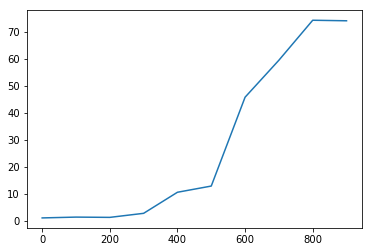

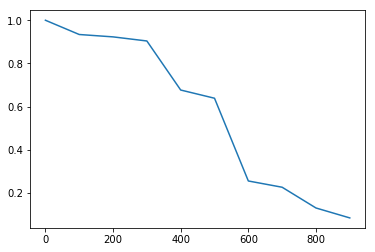

In [122]:
plt.plot(range(0,1000,100),np.mean(dis_num_mat,axis = 1))
plt.show()
plt.plot(range(0,1000,100),np.mean(propor_mat,axis = 1)/20)
plt.show()

In [123]:
##################################################################
# Starter code for Part (d)
##################################################################

np.random.seed(100)
# Sensor locations. 
sensor_loc = generate_sensors()
num_gd_replicates = 100


# Object locations. 
obj_locs = [[[i,i]] for i in np.arange(0,1000,100)]  
sensorDateNum = 10

obj_loc_new = [0, 0]
obj_loc_old = [0, 0]
d_loss = [0, 0]
step_size = 0.1
obj_loc_est = []
dis_predict = []
dis_predict_val = []
dis_predict_loss = []
dis_num_mat = np.zeros((10,10),dtype = np.float)
propor_mat = np.zeros((10,10),dtype = np.float)

for i_1,obj_loc in enumerate(obj_locs):
    print(i_1)
    for j in range(10):
        sensor_loc = generate_sensors()
        distance = generate_data_given_location(sensor_loc, obj_loc)
        obj_loc_est = []
        dis_predict = []
        dis_predict_val = []
        dis_predict_loss = []
        for k in range(100):
            # initial point
            sigma_ini = np.sqrt(obj_loc[0][0] + 1)
            obj_loc_new = np.random.normal(0,sigma_ini,2)
            obj_loc_old = obj_loc_new
            for cnt in range(1000):
                for i in range(7):
                    d_loss += - 2*(np.linalg.norm(sensor_loc[i,:] - obj_loc_old) - distance[0,i])*(sensor_loc[i,:] - obj_loc_old)/np.linalg.norm(sensor_loc[i,:] - obj_loc_old)
                obj_loc_new = obj_loc_old - step_size*d_loss
                obj_loc_old = obj_loc_new
                d_loss = [0, 0]
            # dis_predict_val is n by 2
            # refresh distinct list
            if np.size(dis_predict) > 0:
                for q in range(np.size(dis_predict)):
                    # round to 0.01
                    obj_loc_new = np.around(obj_loc_new,decimals = 2)
                    # compute distance
                    if (obj_loc_new[0] == dis_predict_val[q][0]):
                        if obj_loc_new[1] == dis_predict_val[q][1]:
                            dis_predict[q] += 1
                            break
                    if (q == np.size(dis_predict) - 1):
                        dis_predict.append(1)
                        dis_predict_val.append(obj_loc_new)
                        dis_predict_loss.append(log_likelihood(obj_loc_new,sensor_loc,distance))
            else:
                obj_loc_new = np.around(obj_loc_new,decimals = 2)
                dis_predict.append(1)
                dis_predict_val.append(obj_loc_new)
                dis_predict_loss.append(log_likelihood(obj_loc_new,sensor_loc,distance))
        ind = np.argmax(dis_predict_loss)
        dis_num_mat[i_1,j] = np.size(dis_predict)
        print(dis_predict_val[ind])
        propor_mat[i_1,j] = float(dis_predict[ind]/100)

0
[ 0.53 -0.35]
[-0.09 -0.07]
[ 0.19 -0.26]
[-0.43 -0.38]
[-0.02 -0.28]
[-1.68  0.03]
[-0.19  1.6 ]
[ 0.83  0.66]
[-1.19 -0.15]
[ 0.02 -0.93]
1
[ 98.83  99.88]
[ 100.37   99.97]
[  99.35  100.23]
[ 101.16  100.84]
[ 100.44   99.73]
[ 100.81   99.36]
[ 99.67  99.25]
[ 100.07   99.53]
[ 101.07   99.81]
[ 100.19  100.08]
2
[ 200.46  199.07]
[ 199.51  201.17]
[ 200.94  200.59]
[ 199.31  200.97]
[ 200.99  199.39]
[ 198.93  202.24]
[ 203.93  197.16]
[ 200.21  199.18]
[ 197.68  202.34]
[ 200.8   199.46]
3
[ 301.68  298.58]
[ 304.22  296.  ]
[ 301.84  298.88]
[ 300.26  300.27]
[ 301.75  299.28]
[ 299.6   300.78]
[ 300.52  299.3 ]
[ 302.23  298.39]
[ 299.84  301.24]
[ 300.79  298.65]
4
[ 399.12  400.42]
[ 399.17  400.93]
[ 398.78  400.51]
[ 401.14  399.27]
[ 398.83  401.76]
[ 402.58  397.2 ]
[ 402.7   397.54]
[ 402.18  398.76]
[ 400.38  399.04]
[ 400.63  399.3 ]
5
[ 500.16  499.56]
[ 498.71  500.84]
[ 497.63  501.22]
[ 500.32  499.61]
[ 502.15  498.55]
[ 500.65  498.26]
[ 498.65  501.36]
[ 502.

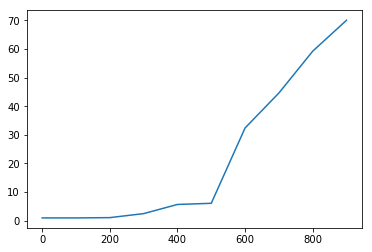

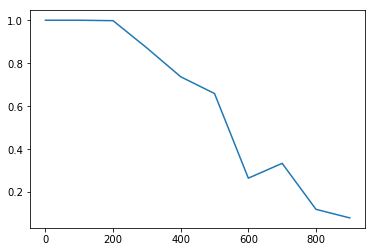

In [124]:
plt.plot(range(0,1000,100),np.mean(dis_num_mat,axis = 1))
plt.show()
plt.plot(range(0,1000,100),np.mean(propor_mat,axis = 1))
plt.show()

### conclusion: as variance becomes small, the unique points become smaller within x1 belongs to (0,500) and the proportion of global minimum number is below 0.5 within(0,500)

## 4-e)

In [127]:
##################################################################
# Starter code for Part (e)
##################################################################

np.random.seed(100)
# Sensor locations. 
#sensor_loc = generate_sensors(k = 12)
num_gd_replicates = 100


# Object locations. 
obj_locs = [[[i,i]] for i in np.arange(0,1000,100)]  
sensorDateNum = 10

obj_loc_new = [0, 0]
obj_loc_old = [0, 0]
d_loss = [0, 0]
step_size = 0.1
obj_loc_est = []
dis_predict = []
dis_predict_val = []
dis_predict_loss = []
dis_num_mat = np.zeros((10,10),dtype = np.float)
propor_mat = np.zeros((10,10),dtype = np.float)

for i_1,obj_loc in enumerate(obj_locs):
    print(i_1)
    for j in range(10):
        sensor_loc = generate_sensors(k = 12)
        distance = generate_data_given_location(sensor_loc, obj_loc, k =12)
        obj_loc_est = []
        dis_predict = []
        dis_predict_val = []
        dis_predict_loss = []
        for k in range(100):
            # initial point
            sigma_ini = np.sqrt(obj_loc[0][0] + 1)
            obj_loc_new = np.random.normal(0,sigma_ini,2)
            obj_loc_old = obj_loc_new
            for cnt in range(1000):
                # sensor number is 12
                for i in range(12):
                    d_loss += - 2*(np.linalg.norm(sensor_loc[i,:] - obj_loc_old) - distance[0,i])*(sensor_loc[i,:] - obj_loc_old)/np.linalg.norm(sensor_loc[i,:] - obj_loc_old)
                obj_loc_new = obj_loc_old - step_size*d_loss
                obj_loc_old = obj_loc_new
                d_loss = [0, 0]
            # dis_predict_val is n by 2
            # refresh distinct list
            if np.size(dis_predict) > 0:
                for q in range(np.size(dis_predict)):
                    # round to 0.01
                    obj_loc_new = np.around(obj_loc_new,decimals = 2)
                    # compute distance
                    if (obj_loc_new[0] == dis_predict_val[q][0]):
                        if obj_loc_new[1] == dis_predict_val[q][1]:
                            dis_predict[q] += 1
                            break
                    if (q == np.size(dis_predict) - 1):
                        dis_predict.append(1)
                        dis_predict_val.append(obj_loc_new)
                        dis_predict_loss.append(log_likelihood(obj_loc_new,sensor_loc,distance))
            else:
                obj_loc_new = np.around(obj_loc_new,decimals = 2)
                dis_predict.append(1)
                dis_predict_val.append(obj_loc_new)
                dis_predict_loss.append(log_likelihood(obj_loc_new,sensor_loc,distance))
        ind = np.argmax(dis_predict_loss)
        dis_num_mat[i_1,j] = np.size(dis_predict)
        print(dis_predict_val[ind])
        propor_mat[i_1,j] = float(dis_predict[ind]/100)

0
[-0.13  0.22]
[-0.19 -0.44]
[ 0.09 -0.53]
[-0.32 -0.12]
[-0.78 -0.46]
[-0.58 -0.2 ]
[-0.71 -0.07]
[ 0.17 -0.26]
[ 0.11  0.3 ]
[ 0.12  0.47]
1
[ 99.98  99.67]
[ 99.96  99.78]
[ 100.27   98.93]
[ 99.78  99.36]
[ 100.25   99.97]
[ 100.32  100.04]
[  98.75  101.43]
[  99.08  100.36]
[ 100.14   99.17]
[ 100.4    99.86]
2
[ 290.67  277.79]
[ 247.78  275.9 ]
[ 242.47  229.55]
[ 244.22  256.91]
[ 199.36  200.59]
[ 250.34  234.28]
[ 231.59  302.15]
[ 290.3   295.02]
[ 303.19  286.63]
[ 220.19  300.64]
3
[ 372.09  476.93]
[-201.71  404.58]
[ 279.97  320.31]
[ 282.69  356.07]
[ 489.48  325.71]
[ 449.07  374.93]
[ 462.03  434.84]
[ 451.69  391.78]
[ 422.2   462.63]
[ 417.85  470.83]
4
[ 364.11  580.21]
[ 105.66  556.4 ]
[ 479.79  665.26]
[ 392.37  401.72]
[ 415.61  479.59]
[ 321.72  457.61]
[ 424.03  355.67]
[ 713.03  304.84]
[ 440.56  372.55]
[ 246.38  741.81]
5
[ 645.68  259.54]
[ 237.57  673.01]
[ 590.87  414.06]
[ 436.99  594.62]
[ -289.31 -1184.64]
[ 713.29  -76.02]
[ 1087.28   124.9 ]
[ 54

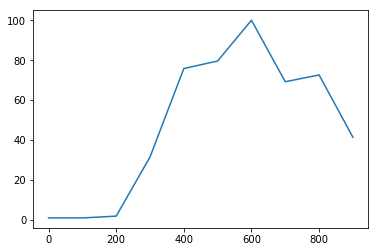

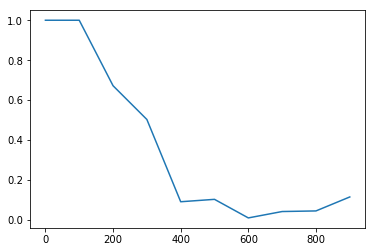

In [128]:
plt.plot(range(0,1000,100),np.mean(dis_num_mat,axis = 1))
plt.show()
plt.plot(range(0,1000,100),np.mean(propor_mat,axis = 1))
plt.show()

## 4-f)

###  start with 100 different initial point choose the final point, which gives the maximum Liklihood. Finally print the best estimation of the sensor location. 

In [4]:
##################################################################
# Starter code for Part (f)
##################################################################
def generate_sensors(k = 7, d = 2):
	"""
	Generate sensor locations. 
	Input:
	k: The number of sensors.
	d: The spatial dimension.
	Output:
	sensor_loc: k * d numpy array.
	"""
	sensor_loc = 100*np.random.randn(k,d)
	return sensor_loc

def generate_data(sensor_loc, k = 7, d = 2, 
				 n = 1, original_dist = True):
	"""
	Generate the locations of n points.  

	Input:
	sensor_loc: k * d numpy array. Location of sensor. 
	k: The number of sensors.
	d: The spatial dimension.
	n: The number of points.
	original_dist: Whether the data are generated from the original 
	distribution. 

	Output:
	obj_loc: n * d numpy array. The location of the n objects. 
	distance: n * k numpy array. The distance between object and 
	the k sensors. 
	"""
	assert k, d == sensor_loc.shape

	obj_loc = 100*np.random.randn(n, d)
	if not original_dist:
	   obj_loc += 300
	   
	distance = scipy.spatial.distance.cdist(obj_loc, 
										   sensor_loc, 
										   metric='euclidean')
	distance += np.random.randn(n, k)  
	return obj_loc, distance

def log_likelihood2(obj_loc, sensor_loc, distance, sensorNum, objNum): 
    """
    This function computes the log likelihood (as expressed in Part a).
    Input: 
    obj_loc: shape [1,2]
    sensor_loc: shape [7,2]
    distance: shape [7]
    Output: 
    The log likelihood function value. 
    """ 
    diff_distance = np.zeros((objNum,sensorNum),dtype = np.float)
    for i in range(sensorNum):
        for j in range(objNum):
            diff_distance[j,i] = np.linalg.norm(sensor_loc[i] - obj_loc[j])- distance[j,i]
    func_value = - np.linalg.norm(diff_distance)**2
    return func_value


# generate three datasets
sensorNum = 7
objNum =100
sensor_loc = generate_sensors(k = sensorNum)

obj_loc_train, distance_train = generate_data(sensor_loc,k = sensorNum, n = objNum, original_dist = True)
obj_loc_inter, distance_inter = generate_data(sensor_loc,k = sensorNum, n = objNum, original_dist = True)
obj_loc_extra, distance_extra = generate_data(sensor_loc,k = sensorNum, n = objNum, original_dist = False)


# Compute Gradient - run 100 times pick the global minimum
sensor_best = np.zeros((sensorNum,2),dtype = np.float)
loss_max = 0
step_size = 0.001
for k in range(10):
    # initial point
    sigma_ini = 100
    sensor_new = np.random.normal(0,sigma_ini,sensorNum*2).reshape(sensorNum,2)
    d_loss = np.zeros((sensorNum,2),dtype = np.float64)
    for cnt in range(1000):
        for sCnt in range(sensorNum):
            for oCnt in range(objNum):
                d_loss[sCnt] += 2*(np.linalg.norm(sensor_new[sCnt] - obj_loc_train[oCnt]) - distance_train[oCnt,sCnt])*(sensor_new[sCnt] - obj_loc_train[oCnt])/np.linalg.norm(sensor_new[sCnt] - obj_loc_train[oCnt])
        sensor_new = sensor_new - step_size * d_loss
        #print(sensor_new)
        d_loss = d_loss - d_loss
    if k == 0:
        loss_max = log_likelihood2(obj_loc_train, sensor_new, distance_train, sensorNum, objNum)
        sensor_best = sensor_new
    if log_likelihood2(obj_loc_train, sensor_new, distance_train, sensorNum, objNum) > loss_max:
        loss_max = log_likelihood2(obj_loc_train, sensor_new, distance_train, sensorNum, objNum)
        sensor_best = sensor_new
        
print(sensor_best)   
print(sensor_loc)

[[  -2.67856306  -31.83297838]
 [ 146.41488406 -185.75305284]
 [ 111.70014625   35.63786372]
 [ -16.77091706  118.9895313 ]
 [  -3.66093668   84.49853466]
 [-119.19379359  115.61474092]
 [ -15.69106833    4.25489564]]
[[  -2.5491359   -31.9545627 ]
 [ 146.34049229 -186.10436898]
 [ 111.68358173   35.46869124]
 [ -16.50147799  118.98927785]
 [  -3.78727118   84.52575403]
 [-119.2862329   115.41381665]
 [ -15.82768719    4.25228767]]


In [170]:
# print the MLE fro best estimation
print(loss_max)

-673.748036312


In [7]:
# Interpolating dataset
obj_best = np.zeros((objNum,2),dtype = np.float)
loss_max = 0
step_size = 0.001
for k in range(10):
    # initial point
    sigma_ini = 100
    obj_new = np.random.normal(0,sigma_ini,objNum*2).reshape(objNum,2)
    d_loss = np.zeros((objNum,2),dtype = np.float64)
    for cnt in range(1000):
        for oCnt in range(objNum):
            for sCnt in range(sensorNum):
                d_loss[oCnt] += -2*(np.linalg.norm(sensor_best[sCnt] - obj_new[oCnt]) - distance_inter[oCnt,sCnt])*(sensor_best[sCnt] - obj_new[oCnt])/np.linalg.norm(sensor_best[sCnt] - obj_new[oCnt])
        obj_new = obj_new - step_size * d_loss
        #print(sensor_new)
        d_loss = d_loss - d_loss
    if k == 0:
        loss_max = log_likelihood2(obj_new, sensor_best, distance_inter, sensorNum, objNum)
        obj_best = obj_new
    if log_likelihood2(obj_new, sensor_best, distance_inter, sensorNum, objNum) > loss_max:
        loss_max = log_likelihood2(obj_new, sensor_best, distance_inter, sensorNum, objNum)
        obj_best = obj_new 
#print(np.linalg.norm(obj_best-obj_loc_inter))  

In [8]:
# print MSE 
print(np.sum(np.linalg.norm(obj_best-obj_loc_inter,axis = 1))/100)  
# print MLE
print(loss_max)  

34.8061637331
-336119.104043


In [1]:
# Extrapolating dataset
obj_best_2 = np.zeros((objNum,2),dtype = np.float)
loss_max = 0
step_size = 0.001
for k in range(10):
    # initial point
    sigma_ini = 100
    obj_new = np.random.normal(300,sigma_ini,objNum*2).reshape(objNum,2)
    d_loss = np.zeros((objNum,2),dtype = np.float64)
    for cnt in range(1000):
        for oCnt in range(objNum):
            for sCnt in range(sensorNum):
                d_loss[oCnt] += -2*(np.linalg.norm(sensor_best[sCnt] - obj_new[oCnt]) - distance_extra[oCnt,sCnt])*(sensor_best[sCnt] - obj_new[oCnt])/np.linalg.norm(sensor_best[sCnt] - obj_new[oCnt])
        obj_new = obj_new - step_size * d_loss
        #print(sensor_new)
        d_loss = d_loss - d_loss
    if k == 0:
        loss_max = log_likelihood2(obj_new, sensor_best, distance_extra, sensorNum, objNum)
        obj_best_2 = obj_new
    if log_likelihood2(obj_new, sensor_best, distance_extra, sensorNum, objNum) > loss_max:
        loss_max = log_likelihood2(obj_new, sensor_best, distance_extra, sensorNum, objNum)
        obj_best_2 = obj_new  

NameError: name 'np' is not defined

In [5]:
# print MSE 
print(np.sum(np.linalg.norm(obj_best_2 - obj_loc_extra,axis = 1))/100)  
# print MLE
print(loss_max) 

NameError: name 'obj_best_2' is not defined